## *santoshhulbutti@gmail.com | DataTrained | Practice Project # 04

## Abalone case study - Age Prediction based on the number of rings.

<h1 align="center"> Objective : to predict number of rings </h1>
<h2> This will be a <u><font color = "green">supervised ML model</font></u> as the dataset has <u><font color = "green">'label' column</font></u> i.e., 'rings'. it will be a <u><font color ='blue'>regression problem - predicting the age (rings +1.5).</font></u>
    
performance metrics will be :
<font color ='purple'> r2_score, mean_squared_error, mean_absolute_error, Sq root of mean_squared_error & Cross-Val-Score</font>
</h2>


<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [49]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from scipy.stats import skew
from scipy import stats


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR


import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [2]:
#creating variable of url
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"

In [3]:
#creating dataframe of data
data = pd.read_csv(url)

<h1 align="center"><font color = "red">Data Preprocessing & EDA</font> </h1>
<h2><font color = "blue">01. Checking the data using .head(), .sample(n), .shape, features' dtypes using .info() & renaming the column names</font></h2>

In [4]:
#checking top 5 rows
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
#checking 10 samples
data.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
441,I,0.335,0.260,0.100,0.1920,0.0785,0.0585,0.0700,8
1171,M,0.625,0.480,0.185,1.2065,0.5870,0.2900,0.2860,8
799,F,0.425,0.345,0.110,0.3665,0.1250,0.0810,0.1170,11
2959,F,0.660,0.525,0.160,1.2770,0.4975,0.3190,0.3940,13
1764,I,0.275,0.175,0.090,0.2315,0.0960,0.0570,0.0705,5
2103,M,0.375,0.290,0.100,0.2760,0.1175,0.0565,0.0850,9
2205,I,0.275,0.220,0.080,0.1365,0.0565,0.0285,0.0420,6
2587,F,0.570,0.445,0.150,0.9950,0.5040,0.1850,0.2505,9
3310,F,0.620,0.485,0.165,1.1660,0.4830,0.2380,0.3550,13
1597,I,0.530,0.430,0.135,0.6255,0.2450,0.1455,0.2135,10


In [6]:
#initial statistical analysis
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

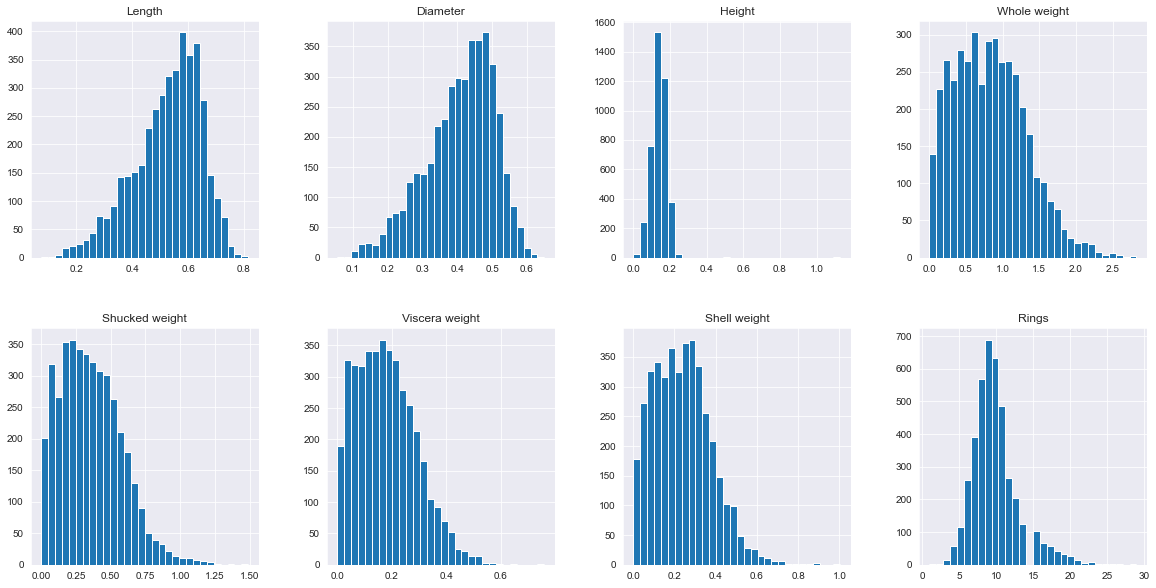

In [7]:
data.hist(figsize=(20,10), layout=(2, 4), bins = 30)

<h2> <font color = "green"> Observation:</font> features are not normaly distributed, but are close to normality.</h2>

In [8]:
#checking shape of the dataframe
data.shape

(4177, 9)

<h2> <font color = "green"> Observation:</font>
    
   We have 4177 rows & 9 columns in given dataset.

   The initial statistical analysis shows that the Ring attribute values ranges from 1 to 29 rings on an abalone specimen.
   However, the most frequent values of Rings are highly concentrated around the median of the distribution, so that, the
   2nd and 3rd quartiles are defined in a range of less than 1 std deviation. We observe that its possible to approximate
   the distribution of this attribute to a normal curve.</h2>

In [9]:
#checking datatypes, length of row & size of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<h2> <font color = "green"> Observation:</font> All features are of the dtype float64 except 'Sex' feature, which is of object data type & label is of int64 type.</h2>

In [10]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [11]:
#renaming column names to remove whitespaces
columns = data.columns.tolist()
columns_renamed = [column.replace(" ", "_").lower() for column in columns]
data.columns = columns_renamed
data.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

<h2> <font color = "green"> Observation:</font> column names are renamed, whitespaces are removed.</h2>

<h2><font color = "blue">02. Checking for the duplicates, missing & null values</font></h2>

In [12]:
# counting number of duplicate rows
data.duplicated().sum()

0

In [13]:
data01 = data.copy()
#check for null values
data01.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

<AxesSubplot:>

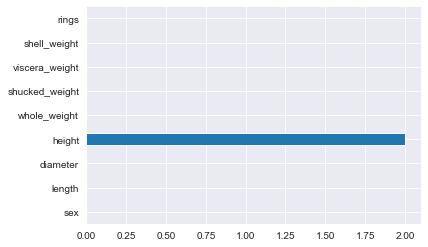

In [14]:
#check columns where it has value as zero
data01[data01==0].count().plot(kind = 'barh')

In [15]:
#check height column
data01['height'][data01['height']==0].value_counts()

0.0    2
Name: height, dtype: int64

In [16]:
#data01['height']#
data01.loc[data01['height']==0]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


<h2> <font color = "green"> Observation:
   </font> 
    
   - We have NO duplicate entries.
    
   - NO missing values.
    
   - <i>height</i> column has 2 entries(index #1257 & 3996 )as 0 /zero.</h2>

In [17]:
# checking total counts in Target attribute
data01['rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: rings, dtype: int64

<AxesSubplot:>

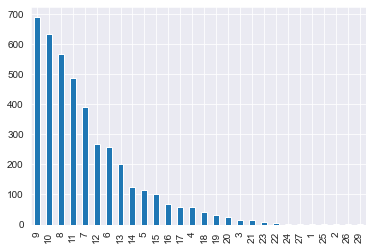

In [18]:
#Plotting the counts of Target attribute
data01['rings'].value_counts().plot(kind = 'bar')

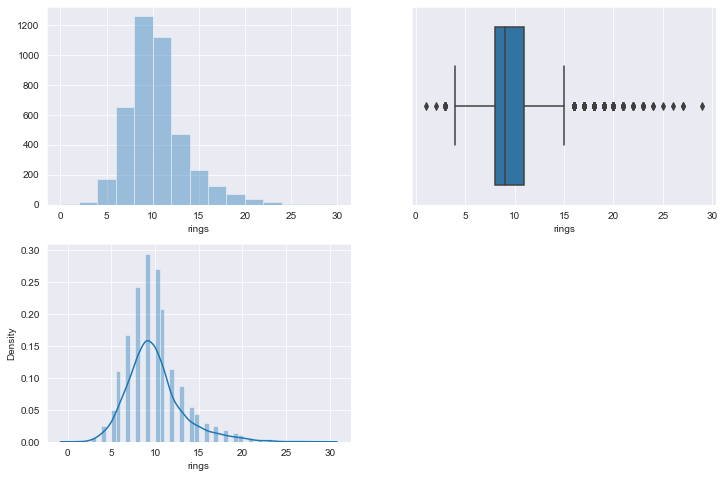

In [19]:
#Plotting the distribution of Target attribute
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data01['rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(data01['rings']);
plt.subplot(2,2,3)
sns.distplot(data01['rings']);

<h2> <font color = "green"> Observation:</font> Most of the observations/abalones are having 7 to 11 rings.</h2>

<h2><font color = "blue">03. Checking relation between individual features & number of rings.
</font></h2>

<h2 align = "center"><font color = "blue">3.1 Sex vs Number of rings.</font></h2>

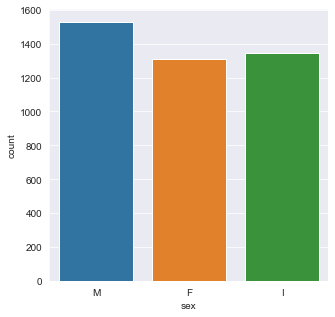

In [20]:
data02 = data01.copy()
plt.figure(figsize=(5,5))
sns.countplot(data02['sex']);

## Bi-Variate analysis of Sex column with rings

<AxesSubplot:xlabel='sex', ylabel='rings'>

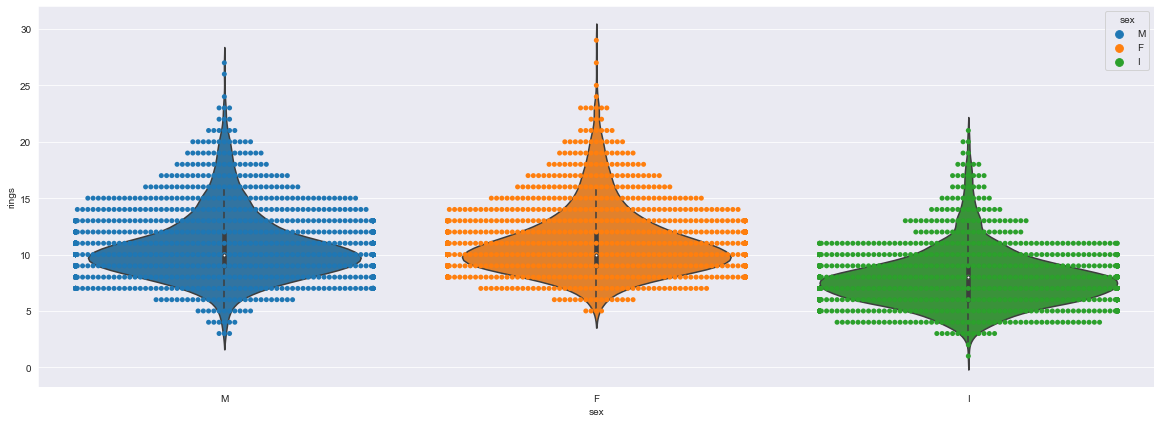

In [21]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'sex', y = 'rings', data = data02, hue = 'sex')
sns.violinplot(x = 'sex', y = 'rings', data = data02)

<h2> <font color = "green"> Observation:</font>
    
    Male : age majority lies in between 6 years to 18 years
    
    Female: age majority lies in between 6 years to 16 years
    
    Immature: age majority lies in between 3 years to 12 years</h2>

In [22]:
data02["sex"].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [23]:
data02.shape

(4177, 9)

<h2 align = "center"><font color = "blue">3.2 height - distribution & Outlier</font></h2>

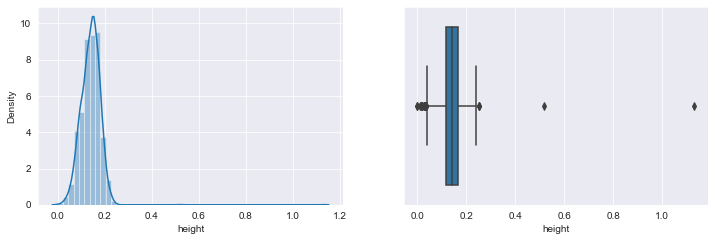

In [24]:
#Plotting the distribution height feature
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['height']);
plt.subplot(2,2,2)
sns.boxplot(data02['height']);

<h2> <font color = "green"> Observation:</font> Due the presence of two observations that lie far beyond the central positions of the height distribution. Thus, we filter these outliers in order to obtain a more realistic visualization of the distribution of the Height attribute</h2>

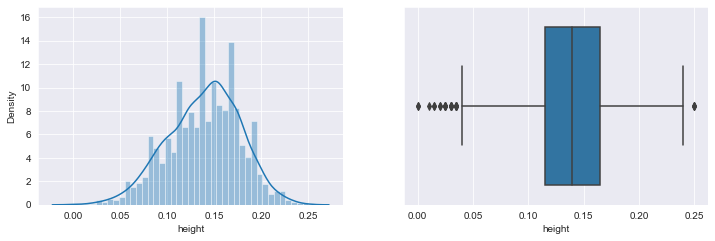

In [25]:
#removing outliers from height attribute
data02 = data02[data02['height'] < 0.4]

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['height']);
plt.subplot(2,2,2)
sns.boxplot(data02['height']);

In [26]:
data02.shape

(4175, 9)

<h2 align = "center"><font color = "blue">3.3 length - distribution & Outlier.</font></h2>

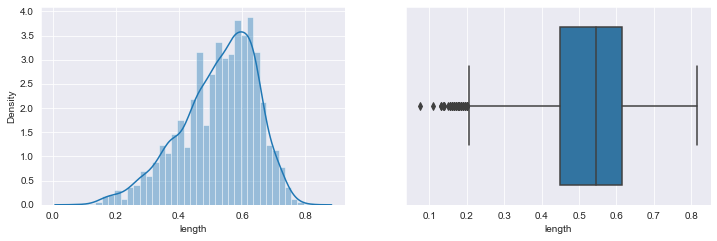

In [27]:
#Plotting the distribution length feature
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['length']);
plt.subplot(2,2,2)
sns.boxplot(data02['length']);

<h2 align = "center"><font color = "blue">3.4 diameter - distribution & Outlier.</font></h2>

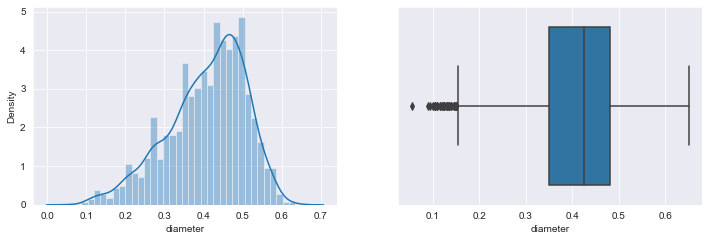

In [28]:
#Plotting the distribution diameter feature
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['diameter']);
plt.subplot(2,2,2)
sns.boxplot(data02['diameter']);

<h2 align = "center"><font color = "blue">3.5 whole_weight - distribution & Outlier.</font></h2>

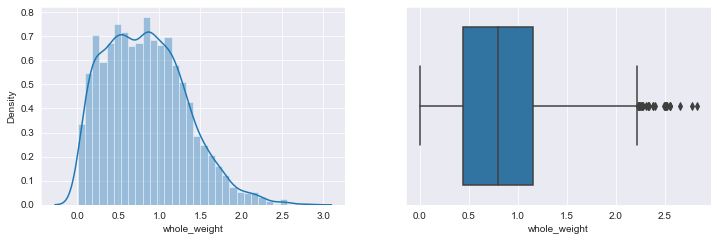

In [29]:
#Plotting the distribution whole_weight feature
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['whole_weight']);
plt.subplot(2,2,2)
sns.boxplot(data02['whole_weight']);

<h2> <font color = "green"> Observation:</font> We will give threshold of 2.5 to remove outliers in 'whole_weight' column</h2>

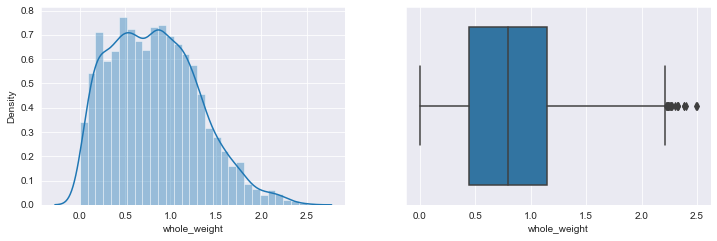

In [30]:
data02 = data02[data02['whole_weight'] <= 2.5]

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['whole_weight']);
plt.subplot(2,2,2)
sns.boxplot(data02['whole_weight']);

<h2 align = "center"><font color = "blue">3.6 shucked_weight - distribution & Outlier.</font></h2>

<AxesSubplot:xlabel='shucked_weight'>

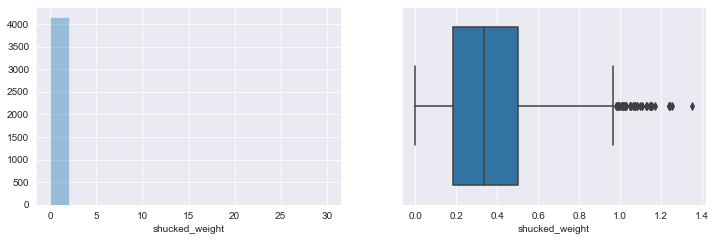

In [31]:
#Plotting the distribution shucked_weight feature
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['shucked_weight'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(data02['shucked_weight'])

<h2> <font color = "green"> Observation:</font> We will give threshold of 1.2 to remove outliers in 'shucked_weight' column</h2>

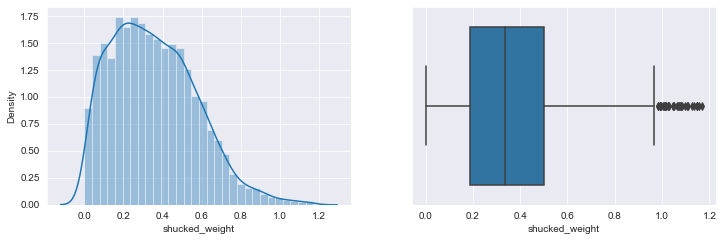

In [32]:
data02 = data02[data02['shucked_weight'] <= 1.2]

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['shucked_weight']);
plt.subplot(2,2,2)
sns.boxplot(data02['shucked_weight']);

<h2 align = "center"><font color = "blue">3.7 viscera_weight - distribution & Outlier.</font></h2>

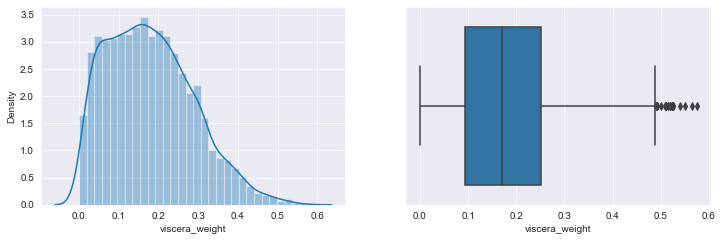

In [33]:
#Plotting the distribution viscera_weight feature
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['viscera_weight']);
plt.subplot(2,2,2)
sns.boxplot(data02['viscera_weight']);

<h2 align = "center"><font color = "blue">3.8 shell_weight - distribution & Outlier.</font></h2>

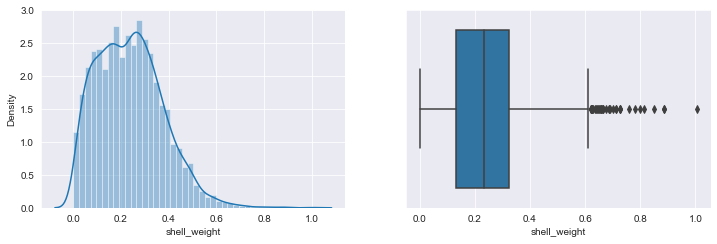

In [34]:
#Plotting the distribution shell_weight feature
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['shell_weight']);
plt.subplot(2,2,2)
sns.boxplot(data02['shell_weight']);

<h2> <font color = "green"> Observation:</font> We will give threshold of 0.8 to remove outliers in 'shell_weight' column</h2>

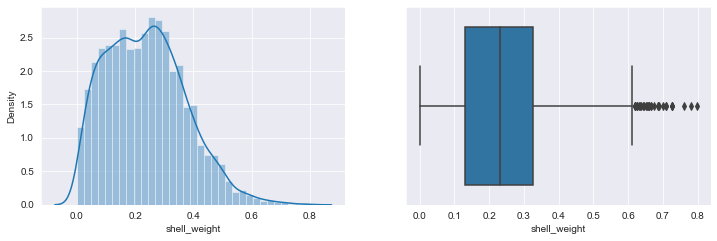

In [35]:
data02 = data02[data02['shell_weight'] <= 0.8]

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data02['shell_weight']);
plt.subplot(2,2,2)
sns.boxplot(data02['shell_weight']);

In [36]:
data02.shape

(4155, 9)

<h2> <font color = "green"> Observation:</font> the total rows are 4155 after removing outliers.</h2>

<h2><font color = "blue">04. removing sex column as it doesnt have significance on number of rings or age.</font></h2>

In [37]:
data03 = data02.drop('sex', axis = 1)

data03

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<h2><font color = "blue">05. changing target variable 'rings' to age as stated in the problem description.
    
    age = rings + 1.5 
    
</font></h2>

In [38]:
data03['age'] = data03['rings']+1.5
data04 = data03.drop('rings', axis = 1)

data04

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


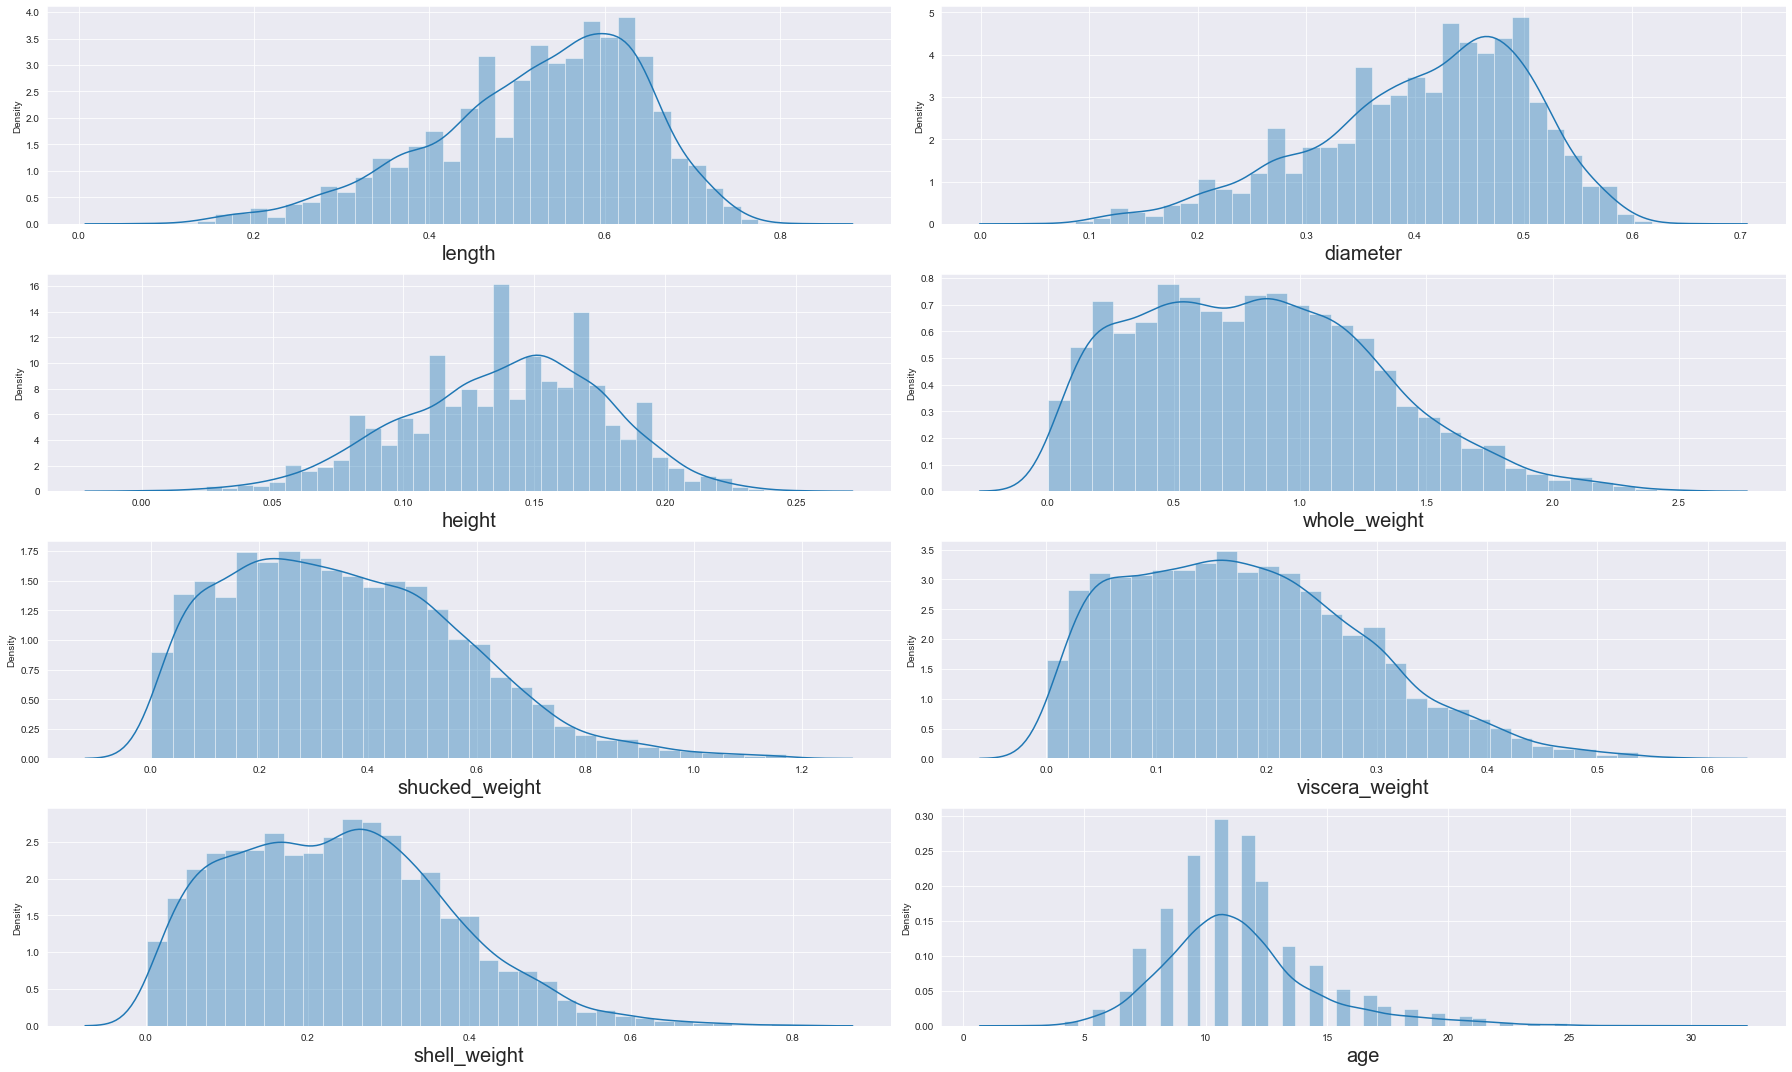

In [39]:
#checking distribution after removing outliers...
plt.figure(figsize=(25,15))
plotnumber = 1

for column in data04.columns:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(data04[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<h2><font color = "blue">06. Feature Engineering & multicollinearity check.
    
   Also applying StandardScaler for our data for VIF calculation & model standardization
</font></h2>

<Figure size 1152x864 with 0 Axes>

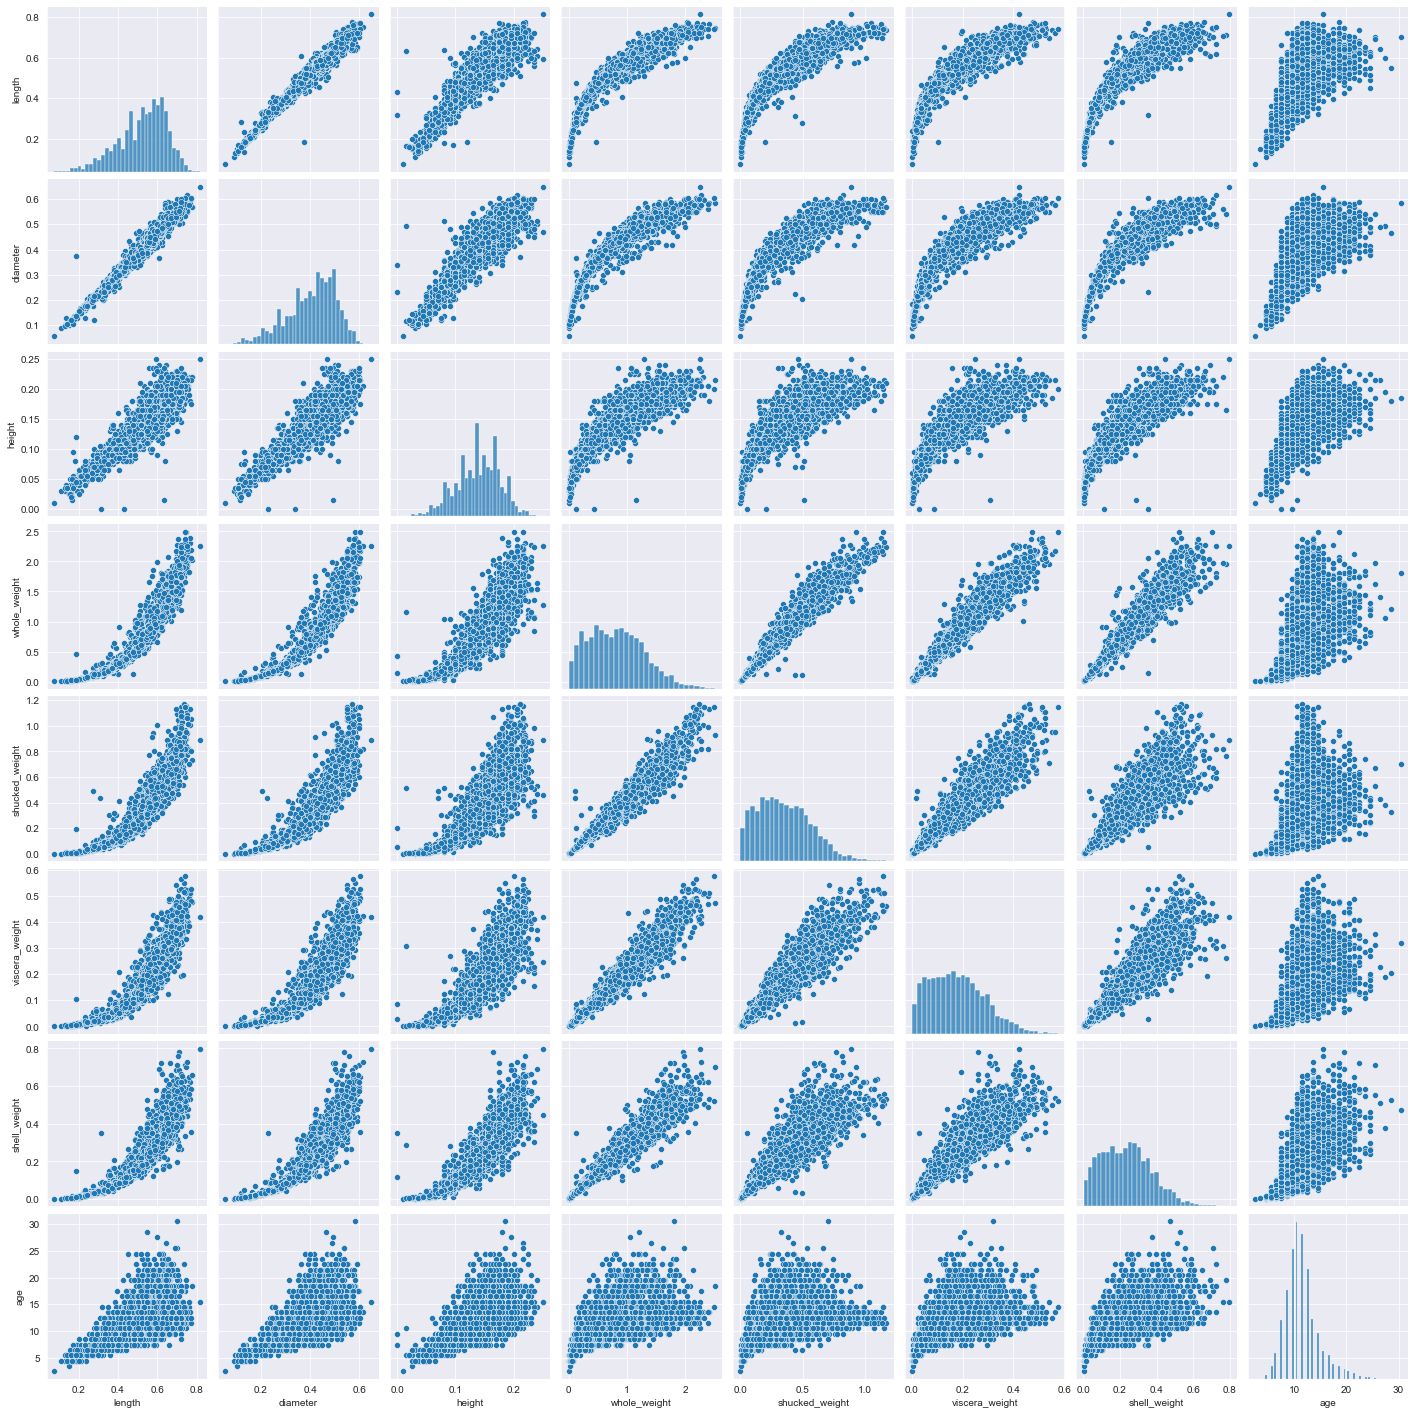

In [40]:
#plotting pairplot
plt.figure(figsize = (16, 12))
sns.pairplot(data04)
plt.show()

<h2> <font color = "green"> Observation:</font> length is linearly correlated with diameter & height, while non-linear relation with whole weight, shucked weight, viscera weight and shell weight.

whole weight has linear relationship with shucked weight, viscera weight and shell weight.
</h2>

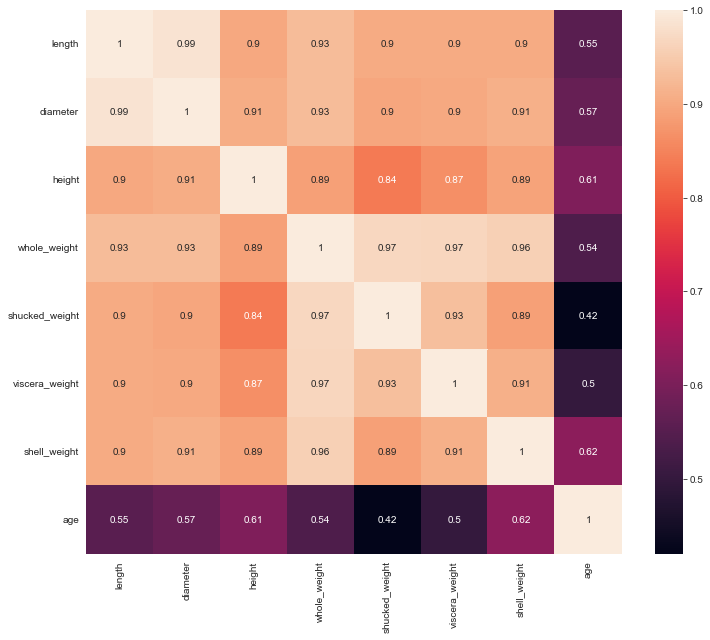

In [41]:
#plotting heatmap to find out correlation between features
plt.figure(figsize = (12, 10))
sns.heatmap(data04.corr(), annot=True)
plt.show()

## Lets check VIF value..

In [42]:
X = data04.drop('age', axis = 1)
Y = data04['age']

# applying Standard scaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

## Check for Variance Inflation factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif_data.sort_values(by = "VIF", ascending=False)

,feature,VIF
3,whole_weight,107.229988
1,diameter,42.027549
0,length,40.620770
4,shucked_weight,28.073467
6,shell_weight,21.975953
5,viscera_weight,17.292437
2,height,6.660436


In [43]:
# lets check correlation matrix of features
corr_matrix = data04.corr()
corr_matrix

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
length,1.000000,0.986651,0.899164,0.928264,0.902698,0.904071,0.903062,0.554724
diameter,0.986651,1.000000,0.905323,0.928107,0.897428,0.900425,0.910580,0.572892
height,0.899164,0.905323,1.000000,0.888768,0.838117,0.866089,0.892117,0.607738
whole_weight,0.928264,0.928107,0.888768,1.000000,0.969802,0.966586,0.957204,0.538160
shucked_weight,0.902698,0.897428,0.838117,0.969802,1.000000,0.932631,0.887015,0.419997
viscera_weight,0.904071,0.900425,0.866089,0.966586,0.932631,1.000000,0.910457,0.501484
shell_weight,0.903062,0.910580,0.892117,0.957204,0.887015,0.910457,1.000000,0.624035
age,0.554724,0.572892,0.607738,0.538160,0.419997,0.501484,0.624035,1.000000


## Lets drop shucked_weight column as it has minimum correlation with age from heatmap

In [82]:
data05 = data04.drop('shucked_weight', axis=1)

X = data05.drop('age', axis = 1)
Y = data05['age']

# applying Standard scaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

## Check for Variance Inflation factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif_data.sort_values(by = "VIF", ascending=False)

,feature,VIF
1,diameter,42.026460
0,length,40.283752
3,whole_weight,35.107102
4,viscera_weight,16.198137
5,shell_weight,14.223983
2,height,6.616585


In [83]:
# lets check correlation matrix of features
corr_matrix = data05.corr()
corr_matrix

,length,diameter,height,whole_weight,viscera_weight,shell_weight,age
length,1.000000,0.986651,0.899164,0.928264,0.904071,0.903062,0.554724
diameter,0.986651,1.000000,0.905323,0.928107,0.900425,0.910580,0.572892
height,0.899164,0.905323,1.000000,0.888768,0.866089,0.892117,0.607738
whole_weight,0.928264,0.928107,0.888768,1.000000,0.966586,0.957204,0.538160
viscera_weight,0.904071,0.900425,0.866089,0.966586,1.000000,0.910457,0.501484
shell_weight,0.903062,0.910580,0.892117,0.957204,0.910457,1.000000,0.624035
age,0.554724,0.572892,0.607738,0.538160,0.501484,0.624035,1.000000


## Lets drop diameter & viscera_weight column to reduce multicollinearity.

In [84]:
data06 = data05.drop(['diameter', 'viscera_weight'], axis=1)

X = data06.drop('age', axis = 1)
Y = data06['age']

# applying Standard scaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

## Check for Variance Inflation factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif_data.sort_values(by = "VIF", ascending=False)

,feature,VIF
2,whole_weight,16.227454
3,shell_weight,13.225944
0,length,8.916337
1,height,6.385183


In [85]:
# lets check correlation matrix of features
corr_matrix = data06.corr()
corr_matrix

,length,height,whole_weight,shell_weight,age
length,1.000000,0.899164,0.928264,0.903062,0.554724
height,0.899164,1.000000,0.888768,0.892117,0.607738
whole_weight,0.928264,0.888768,1.000000,0.957204,0.538160
shell_weight,0.903062,0.892117,0.957204,1.000000,0.624035
age,0.554724,0.607738,0.538160,0.624035,1.000000


<h2> <font color = "green"> Observation:</font> Multicollinearity has been minimized.</h2>

<h2><font color = "blue">07. Outlier detection and removal using Z score method. 
</font></h2>

In [86]:
data06_outlier= data06.copy()
z = np.abs(stats.zscore(data06_outlier))
print(z)

[[0.56892573 1.14745984 0.64116463 0.63903593 1.58991207]
 [1.448083   1.27836138 1.24370033 1.22906272 0.90967064]
 [0.05904374 0.10024758 0.30073718 0.19651584 0.28477496]
 ...
 [0.64514858 1.73237389 0.74143029 0.52626697 0.28477496]
 [0.85447174 0.29245702 0.57121657 0.43776296 0.02767288]
 [1.56617048 1.47057083 2.35480578 1.90545459 0.65256856]]


In [87]:
threshold = 3
print(np.where(z > 3))

(array([   6,   72,   81,   83,  129,  163,  163,  164,  177,  228,  232,
        232,  233,  234,  235,  266,  271,  273,  274,  290,  306,  309,
        310,  330,  347,  351,  354,  354,  358,  371,  412,  413,  424,
        427,  429,  465,  474,  476,  497,  522,  526,  568,  624,  669,
        670,  671,  674,  690,  692,  715,  716,  740,  750,  752,  807,
       1046, 1168, 1187, 1249, 1418, 1419, 1972, 1973, 1974, 2076, 2099,
       2142, 2153, 2160, 2164, 2183, 2185, 2192, 2193, 2258, 2259, 2289,
       2318, 2327, 2341, 2351, 2364, 2419, 2442, 2454, 2606, 2607, 2845,
       2989, 2989, 3121, 3129, 3130, 3130, 3132, 3132, 3169, 3169, 3174,
       3261, 3340, 3408, 3778, 3877, 3880, 3880, 3902, 3906, 3908, 3922,
       3974, 4123], dtype=int64), array([4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 0, 1, 0, 0, 0, 4, 4, 3, 4, 4, 4, 4,
       4, 3, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 1, 0, 0, 0, 4, 4, 4, 4, 2, 1, 2, 1, 3, 0, 3, 0, 0, 3, 0,
       3, 1, 4, 

### The above data shows outlier where z score is more than 3. The first array contains the list of row numbers and second array respective column number.

## now we want to remove or filter the outliers and get the clean data.

In [88]:
data06_outlier= data06_outlier[(z < 3).all(axis=1)]
data06_outlier.shape

(4051, 5)

In [89]:
data.shape

(4177, 9)

<h2> <font color = "green"> Observation:</font> from above we see we have removed around 126 rows from the dataset i.e. outliers have been removed..</h2>

## Check for skewness

In [90]:
data06_outlier.skew()

length         -0.603761
height         -0.226464
whole_weight    0.399014
shell_weight    0.360261
age             0.718129
dtype: float64

<h2><font color = "blue">08. Preparing data for ML model</font></h2>

## Separating Input Features and Output Features

In [91]:
X = data06_outlier.drop(['age'], axis = 1)
y = data06_outlier.age

## preparing train & test set..

In [92]:
#Creating train & test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h1 align="center"><font color = "red">Model selection</font> </h1>

###  We will check following models & select the best performing one

KNeighborsRegressor

RandomForestRegressor

LinearRegression

GradientBoostingRegressor

Ridge

SVR

## Ridge model

In [93]:
ridge_model = Ridge()

In [94]:
ridge_model.fit(x_train, y_train)


kf = KFold(n_splits = 5)
results = cross_val_score(ridge_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)


test_ids = pd.Series(y_test.index, name='id')
y_pred = ridge_model.predict(x_test)
sub = pd.concat([test_ids, pd.Series(y_pred, name='age')], axis=1)
print('r2 score : ', r2_score(y_test, y_pred))
print('cross_val_score : ', np.sqrt(np.mean(-results)))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score :  0.41965885670347836
cross_val_score :  2.1037772681936207
MAE :  1.6409331517234427
MSE :  5.083459298248875
SMSE :  2.254652811021882


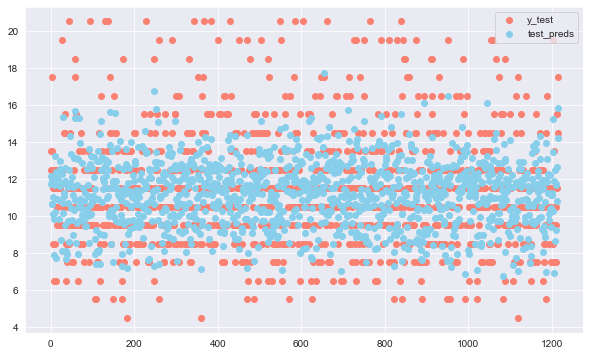

In [95]:
# Visualize predictions vs true ages
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), y_pred, color="skyblue", label="test_preds")
plt.legend();

## KNeighbors regression model

In [96]:
knr_model = KNeighborsRegressor()

In [97]:
knr_model.fit(x_train, y_train)


kf = KFold(n_splits = 5)
results = cross_val_score(knr_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)


test_ids = pd.Series(y_test.index, name='id')
y_pred = knr_model.predict(x_test)
sub = pd.concat([test_ids, pd.Series(y_pred, name='age')], axis=1)
print('r2 score : ', r2_score(y_test, y_pred))
print('cross_val_score : ', np.sqrt(np.mean(-results)))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score :  0.42594967892683466
cross_val_score :  2.152637527433495
MAE :  1.6338815789473684
MSE :  5.028355263157894
SMSE :  2.242399443265605


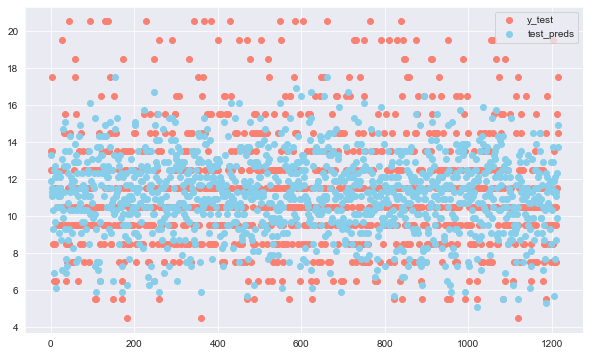

In [98]:
# Visualize predictions vs true ages
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), y_pred, color="skyblue", label="test_preds")
plt.legend();

## Random Forest model

In [99]:
rf_model = RandomForestRegressor()

In [100]:
rf_model.fit(x_train, y_train)


kf = KFold(n_splits = 5)
results = cross_val_score(rf_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)


test_ids = pd.Series(y_test.index, name='id')
y_pred = rf_model.predict(x_test)
sub = pd.concat([test_ids, pd.Series(y_pred, name='age')], axis=1)
print('r2 score : ', r2_score(y_test, y_pred))
print('cross_val_score : ', np.sqrt(np.mean(-results)))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score :  0.4601669114632517
cross_val_score :  2.095345973207165
MAE :  1.5913372493734335
MSE :  4.728631711059643
SMSE :  2.1745417243777236


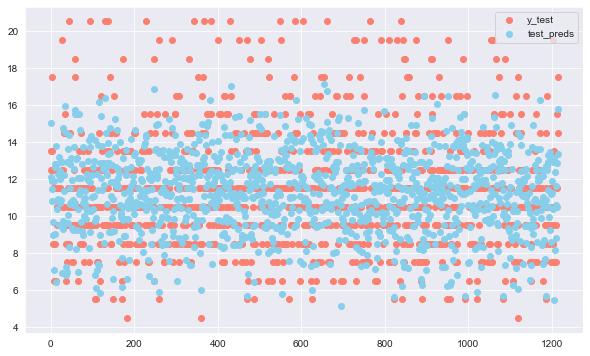

In [101]:
# Visualize predictions vs true ages
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), y_pred, color="skyblue", label="test_preds")
plt.legend();

## Linear Regression model

In [102]:
lr_model = LinearRegression()

In [103]:
lr_model.fit(x_train, y_train)


kf = KFold(n_splits = 5)
results = cross_val_score(lr_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)


test_ids = pd.Series(y_test.index, name='id')
y_pred = lr_model.predict(x_test)
sub = pd.concat([test_ids, pd.Series(y_pred, name='age')], axis=1)
print('r2 score : ', r2_score(y_test, y_pred))
print('cross_val_score : ', np.sqrt(np.mean(-results)))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score :  0.4361026843054391
cross_val_score :  2.080409912189903
MAE :  1.6164431991490116
MSE :  4.939420693908051
SMSE :  2.2224807522019288


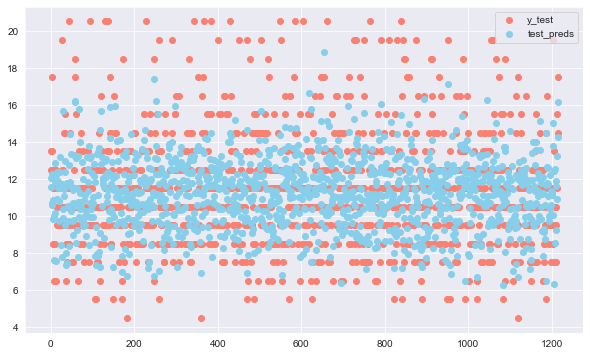

In [104]:
# Visualize predictions vs true ages
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), y_pred, color="skyblue", label="test_preds")
plt.legend();

## Gradient Boosting Regressor model

In [105]:
gbr_model = GradientBoostingRegressor()

In [106]:
gbr_model.fit(x_train, y_train)


kf = KFold(n_splits = 5)
results = cross_val_score(gbr_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)


test_ids = pd.Series(y_test.index, name='id')
y_pred = gbr_model.predict(x_test)
sub = pd.concat([test_ids, pd.Series(y_pred, name='age')], axis=1)
print('r2 score : ', r2_score(y_test, y_pred))
print('cross_val_score : ', np.sqrt(np.mean(-results)))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score :  0.4797030017829975
cross_val_score :  2.0122086505576173
MAE :  1.5734610764685084
MSE :  4.557506638962869
SMSE :  2.134831758936256


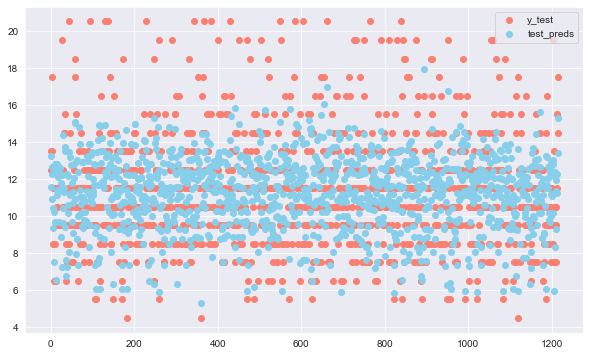

In [107]:
# Visualize predictions vs true ages
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), y_pred, color="skyblue", label="test_preds")
plt.legend();

## Support Vector regressor model

In [108]:
svr_model = SVR()

In [109]:
svr_model.fit(x_train, y_train)


kf = KFold(n_splits = 5)
results = cross_val_score(svr_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)


test_ids = pd.Series(y_test.index, name='id')
y_pred = svr_model.predict(x_test)
sub = pd.concat([test_ids, pd.Series(y_pred, name='age')], axis=1)
print('r2 score : ', r2_score(y_test, y_pred))
print('cross_val_score : ', np.sqrt(np.mean(-results)))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score :  0.4070429046319002
cross_val_score :  2.110963773658841
MAE :  1.5764632725326617
MSE :  5.193967883768475
SMSE :  2.2790278374272823


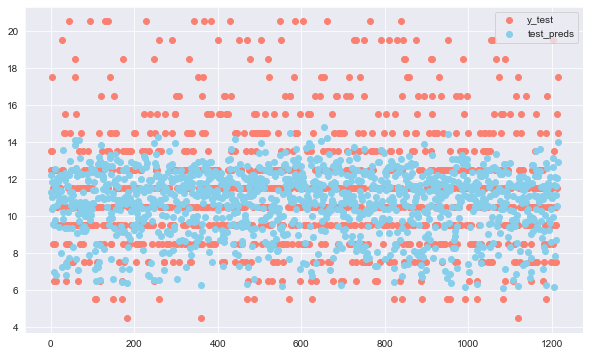

In [110]:
# Visualize predictions vs true ages
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), y_pred, color="skyblue", label="test_preds")
plt.legend();

In [111]:
# data06 = data05.drop('diameter', axis=1)

# X = data06.drop('age', axis = 1)
# Y = data06['age']

# scaler = StandardScaler()

# x_scaled = scaler.fit_transform(X)
# x = pd.DataFrame(x_scaled, index = X.index, columns = X.columns)

## Check for Variance Inflation factor
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# vif_data.sort_values(by = "VIF", ascending=False)


# vif_data["VIF"] = [variance_inflation_factor(X, i)
# for i in range(len(X.columns))]

<h2> <font color = "green"> Observation:</font> From initial models study we found that out of all the 6 models, Random Forest model was having minimum difference between cross_val_score & SMSE. Hence selecting the Random Forest model for model building</h2>

<h1 align="center"><font color = "red">Hyperparameter Tuning using GridSearchCV</font></h1>

In [112]:
## Defining grid parameters for gradient boosting classifier

param_grid = {  'bootstrap': [True],
              'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
             }

In [113]:
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid,
                           cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [114]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [115]:
best_params = grid_search.best_params_
best_params

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 12}

In [116]:
rf_tuned_model = RandomForestRegressor(bootstrap=True, max_depth=5, max_features='auto', n_estimators=12)

rf_tuned_model.fit(x_train, y_train)


kf = KFold(n_splits = 5)
results = cross_val_score(rf_tuned_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)


test_ids = pd.Series(y_test.index, name='id')
y_pred = rf_tuned_model.predict(x_test)
sub = pd.concat([test_ids, pd.Series(y_pred, name='age')], axis=1)
print('r2 score : ', r2_score(y_test, y_pred))
print('cross_val_score : ', np.sqrt(np.mean(-results)))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score :  0.4655455601133114
cross_val_score :  2.0482940459640173
MAE :  1.5873437487885043
MSE :  4.6815177991683585
SMSE :  2.163681538297251


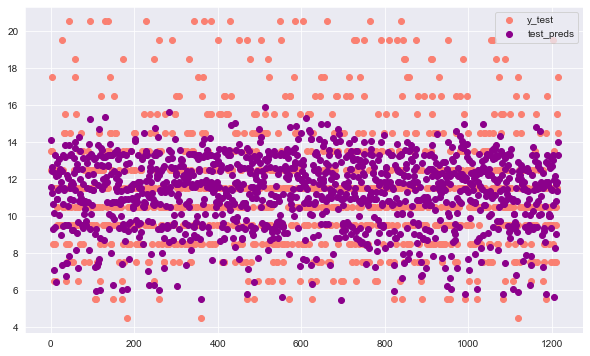

In [117]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), y_pred, color="darkmagenta", label="test_preds")
plt.legend();

In [118]:
X

,length,height,whole_weight,shell_weight
0,0.455,0.095,0.5140,0.1500
1,0.350,0.090,0.2255,0.0700
2,0.530,0.135,0.6770,0.2100
3,0.440,0.125,0.5160,0.1550
4,0.330,0.080,0.2050,0.0550
...,...,...,...,...
4172,0.565,0.165,0.8870,0.2490
4173,0.590,0.135,0.9660,0.2605
4174,0.600,0.205,1.1760,0.3080
4175,0.625,0.150,1.0945,0.2960


<h2> <font color = "green"> Observation:</font> After finetuning the Ridge regressor, the Cross val score decreased & SMSE increased.</h2>

<h1 align="center"><font color = "red">Model Saving & Predicting</font></h1>

In [119]:
pickle.dump(rf_tuned_model, open('Abalone_Age_prediction', 'wb'))

In [120]:
loaded_model = pickle.load(open('Abalone_Age_prediction', 'rb'))

#Creating function to display age of abalone,
def check_age(length,height,whole_weight,shell_weight):
    age = loaded_model.predict(scaler.transform([[length,height,whole_weight,shell_weight]]))[0]
    print('The age of Abalone is :', age)

In [121]:
# check_age(length,height,whole_weight,shell_weight)
check_age(0.64, 0.175, 1.1545, 0.288)
check_age(0.485, 0.13, 0.568, 0.154)
check_age(0.6,0.205,1.176,0.308)
check_age(0.71,0.195,1.9485,0.495)
check_age(0.6, 0.25, 0.85, 0.22)

The age of Abalone is : 14.133600813202897
The age of Abalone is : 5.077405635300372
The age of Abalone is : 15.242823005356096
The age of Abalone is : 13.277713597004704
The age of Abalone is : 6.960428007261775
